# Unit 6 - Pythonic Monopoly
## The following script will be used to create a PyViz dashboard that will help customers view a range of data to determine if they want to invest in rental properties in San Francisco. 

### San Francisco Housing Rental Analysis

In [1]:
# Initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/renatabal/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [3]:
# Read the census data into a DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [4]:
#Calculate the mean number of housing units per year

In [5]:
housing_units = sfo_data["housing_units"]
housing_units = housing_units.groupby([sfo_data.index]).mean()
housing_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

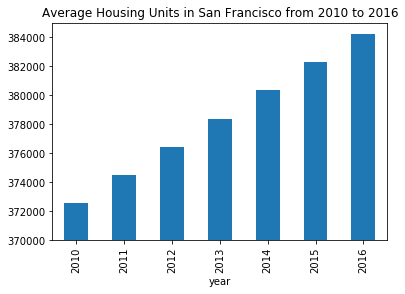

In [6]:
fig_housing_units = plt.figure()
housing_units_plot = housing_units.plot.bar(x='year', ylim=[370000, 385000], title="Average Housing Units in San Francisco from 2010 to 2016")
plt.close(fig_housing_units)
plt.show()
fig_housing_units

### Average Gross Rent and Average Sales Prices per Square Foot

In [7]:
average_gross_rent = sfo_data["gross_rent"].groupby([sfo_data.index]).mean()
average_gross_rent
    
  

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
2015    3739
2016    4390
Name: gross_rent, dtype: int64

In [8]:
average_price = sfo_data["sale_price_sqr_foot"].groupby([sfo_data.index]).mean()
average_price

year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
2015    632.540352
2016    697.643709
Name: sale_price_sqr_foot, dtype: float64

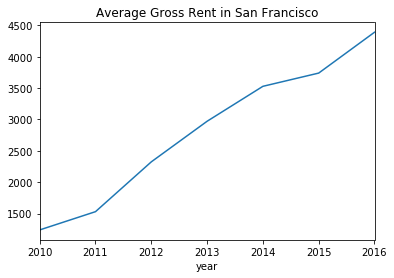

In [9]:
#Plot average gross rent per year as a line chart
gross_rent_fig = plt.figure()
gross_rent_plot = (average_gross_rent.plot.line(x='Year', y='Gross Rent', title="Average Gross Rent in San Francisco"))
plt.close(gross_rent_fig)
gross_rent_fig

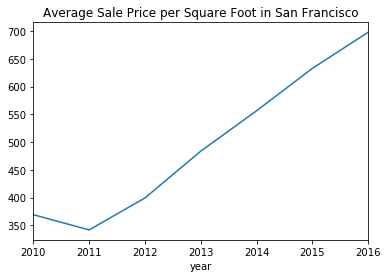

In [10]:
#Plot average sales price per year as a line chart
sales_price_fig = plt.figure()
average_price_plot = (average_price.plot.line(x='year', y='Avg Sale Price', title="Average Sale Price per Square Foot in San Francisco"))
plt.close(sales_price_fig)
sales_price_fig

### Average Prices by Neighbourhood

In [11]:
#Group by year and neighborhood and then create a new dataframe of the mean values
sfo_data_new = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean() 
sfo_data_new.reset_index(inplace=True)
sfo_data_new.rename(columns={"level_0": "year"}, inplace=True)
sfo_data_new.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [13]:
# Use hvplot to create an interactive line chart of the average price per sq ft. with a dropdown selector for the neighborhood

sfo_sales_plot = sfo_data_new.hvplot.line(
    "year",
    "sale_price_sqr_foot",
    xlabel="Year",
    ylabel="Avg. Sale Price per Square Foot",
    groupby="neighborhood",
)

sfo_sales_plot

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

### The 10 Most Expensive Neighbourhoods

In [15]:
#Calculate the mean sale price for each neighbourhood, sort the values to obtain the 10 most expensive on average

expensive_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
expensive_neighborhoods = expensive_neighborhoods.sort_values(
    by="sale_price_sqr_foot", ascending=False
).head(10)
expensive_neighborhoods = expensive_neighborhoods.reset_index()
expensive_neighborhoods

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [20]:
#Plot the data using a bar chart 
expensive_neighborhoods.hvplot.bar(
    "neighborhood",
    "sale_price_sqr_foot",
    title="Top 10 Expensive Neighborhoods in San Francisco",
    xlabel="Neighborhood",
    ylabel="Avg. Sale Price per Square Foot",
    height=400,
    rot=90
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

### Parallel Coordinates and Parallel Categories Analysis 
#### Here we will use plotly express to create paralell coordinates and parallel categories visualizations so that investors can interactively filter various factors related to the sales price of the neighbourhoors

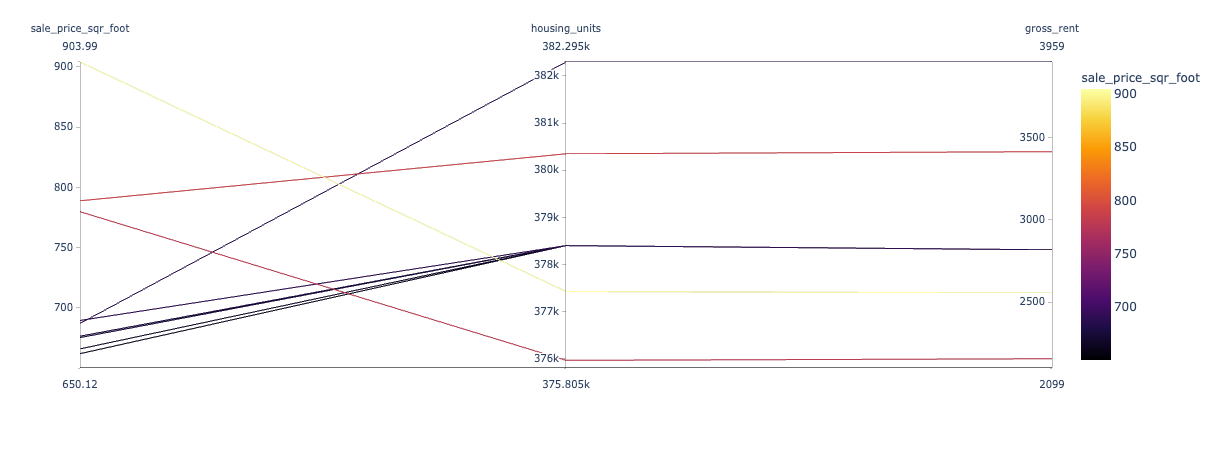

In [24]:
#Create a Parallel Coordinates Plot using average values per neighbourghood
px.parallel_coordinates(
    expensive_neighborhoods,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)


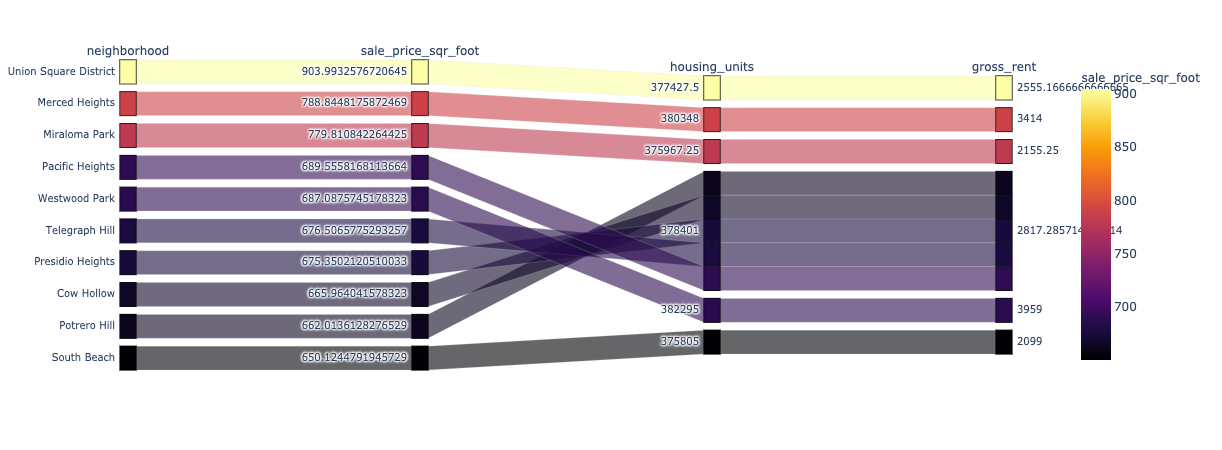

In [23]:
#Create a Parallel Categories Plot
px.parallel_categories(
    expensive_neighborhoods,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)

### Neighbourhood Map 
#### Below we will read in neighboor location data and build an interactive map with the average prices per neighborhood. Then we will use a scatter_mapbox from plotly express to create a visualization

In [25]:
#Load neighbourhoods coordinates data 
file_path = Path("neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


##### Data Preparation - join the location data with the mean prices per neighbourhood 

In [27]:
#Calculate the mean values for each neighbourhood
df_all_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
df_all_neighborhoods.reset_index(inplace=True)
df_all_neighborhoods.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
df_all_neighborhoods.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [28]:
#Join the average values with the neighborhood locations
df_all_neighborhoods = pd.merge(
    df_neighborhood_locations, df_all_neighborhoods, on="Neighborhood"
)
df_all_neighborhoods.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


In [36]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

### Mapbox Visualization
#### Plot the average values per neighborhood with a plotly express scatter_mapbox visualization

In [39]:
#Create a scatter mapbox to analyze neighborhood info 
location_map = px.scatter_mapbox(
    df_all_neighborhoods,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    title="Average Sale Price per Square Foot and Gross Rent in San Francisco",
    zoom=11,
    width=800,
)


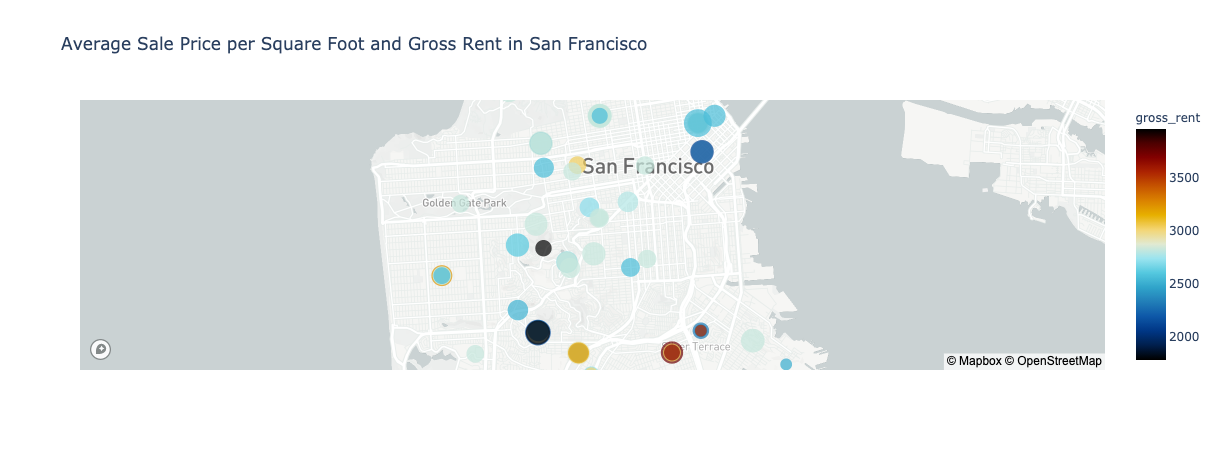

In [40]:
location_map.show()